## Importing required libraries

In [121]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
import numpy.ma as ma

## Getting the dataframe which has all the diagnosis codes for all 10000 patients

In [157]:
df1 = pd.read_csv('10k_diagnosis_modified.csv',sep='\t',header=None)
df1 = df1.rename(columns={0: 'patient_id', 1: 'diagnosis_coded'})
df1.head()


list_index=[]
for i in range(df1.shape[0]): #Taking only the 10 diagnoses
    if df1.iloc[i,1]=='1385187' or df1.iloc[i,1]=='1385109' or df1.iloc[i,1]=='1384870' or df1.iloc[i,1]=='1384841' or df1.iloc[i,1]=='1384995' or df1.iloc[i,1]=='1397715' or df1.iloc[i,1]=='1384886' or df1.iloc[i,1]=='1474651' or df1.iloc[i,1]=='1385083' or df1.iloc[i,1]=='1385121':
        #print(i)
        list_index.append(i)
        
df1=df1.iloc[list_index]
df1=df1.reset_index()
df1=df1.drop(['index'], axis=1)
df1=df1.drop_duplicates()
df1=df1.reset_index()
df1=df1.drop(['index'], axis=1)
df1.head()

,patient_id,diagnosis_coded
0,19563570,1384841
1,19557987,1384841
2,19557524,1384841
3,19556594,1384841
4,19555886,1384841


In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15209 entries, 0 to 15208
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       15209 non-null  int64 
 1   diagnosis_coded  15209 non-null  object
dtypes: int64(1), object(1)
memory usage: 237.8+ KB


## Getting the dataframe which has all the patients' (n=10000) value_numeric for all the concepts

In [125]:
df = pd.read_csv('10k_obs_modified.csv',sep="\t",header=None)
df = df.rename(columns={0:'patient_id',1: 'concept_id', 2: 'value_numeric',3:'value_coded'})
df=df.drop(['value_coded'], axis=1) #we do not need value_coded column anymore
df["value_numeric"] = df["value_numeric"].str.replace(r'\\N','np.nan', regex=True) #replacing \N with 0
df=df.replace("np.nan",np.nan)
df["value_numeric"]=df['value_numeric'].astype(float) #converting the datatypes of value_numeric as float
df=df.dropna()
df=df.reset_index(drop=True)
data=df
data.head()

,patient_id,concept_id,value_numeric
0,16359994,1482681,0.883785
1,16359994,1520177,74.000000
2,16359994,1520177,74.000000
3,16359994,1520177,75.000000
4,16359994,1520177,74.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391710 entries, 0 to 9391709
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   patient_id     int64  
 1   concept_id     int64  
 2   value_numeric  float64
dtypes: float64(1), int64(2)
memory usage: 215.0 MB


### check the number of unique patients in the dataframe

In [160]:
print("Unique patients:",len(df["patient_id"].unique()))

Unique patients: 10000


## Getting value_numeric in different columns using get_dummies

In [128]:
df["concept_id"] = df["concept_id"].astype("category")
df['concept_id'].dtypes
dummies = pd.get_dummies(df['concept_id'])
dummies=dummies.replace(0,np.nan)
dummies=dummies.astype(float)
dummies.values[dummies == 1.0] = df['value_numeric']
dummies

,1482681,1520176,1520177,1520178,1520179,1520180,1520181,1520182,1520183,1520184,...,1529674,1529675,1529676,1529677,1529678,1529679,1529680,1529682,1529683,1529684
0,0.883785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9391705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9391706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9391707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9391708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Taking the patient_id column only to merge with dummies dataframe

In [161]:
data_id_only=df[['patient_id']]

## Now merging these two dataframes

In [132]:
dataframe=pd.concat([data_id_only,dummies],axis=1)
dataframe=dataframe.dropna(axis=1,how='all')

## Now if there are multiple rows for one patient, we are squeezing the dataframe to reduce the total number of rows(and making it equal to the number of patients) by taking the mean value of the column values for individual patient

In [133]:
squeezed= dataframe.groupby('patient_id').agg('mean')
squeezed=squeezed.reset_index()
squeezed

,patient_id,1482681,1520176,1520177,1520178,1520179,1520180,1520181,1520182,1520183,...,1529674,1529675,1529676,1529677,1529678,1529679,1529680,1529682,1529683,1529684
0,16359994,0.883785,1.550000,79.000000,117.0,129.0,NaN,NaN,NaN,14.909091,...,79.40,174.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16360107,2.967860,2.200000,92.000000,38.4,NaN,2454.0,NaN,7.266667,14.821782,...,84.85,180.875,69.5,176.5,NaN,NaN,NaN,NaN,NaN,NaN
2,16360581,NaN,NaN,96.000000,NaN,NaN,NaN,NaN,NaN,11.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16360590,2.304110,NaN,84.833333,NaN,NaN,NaN,NaN,NaN,11.000000,...,79.30,174.500,65.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN
4,16360714,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,12.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19998350,NaN,2.100000,81.666667,NaN,32.0,NaN,NaN,NaN,13.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19998497,NaN,1.500000,91.851852,24.0,199.5,NaN,NaN,NaN,14.923077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19999379,NaN,NaN,92.000000,NaN,NaN,NaN,NaN,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19999625,0.960741,0.100000,86.000000,65.0,NaN,NaN,NaN,NaN,12.181818,...,50.50,111.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now adding more rows for the patients if they have multiple diagnosese

In [162]:
uniquep=list(df1["patient_id"].unique())
allp=list(df1["patient_id"].values)
for i in range(len(uniquep)):
    for j in range(len(allp)):
        if uniquep[i]==allp[j]:
            allp.remove(allp[j])
            break

In [ ]:
dataset_for_modeling=squeezed
dataset_feb04=dataset_for_modeling
for i in range(len(allp)):
#     if i>100:
#         break
    patient_id=allp[i]
    #print(patient_id)
    print("i",i)
    for j in range(dataset_for_modeling.shape[0]):
#         if j>5:
#             break
        #print(j)
        patient_id_1=dataset_for_modeling["patient_id"][j]
        #print(patient_id_1)
        if str(patient_id)==str(patient_id_1):
            #print("j",j)
            patient_id_1=patient_id_1
            df_2=dataset_for_modeling.query("patient_id == @patient_id_1")
            #if df_2.shape[0]>1:
            #df_1=df_2.head(1)
            #display(df_2)
            dataset_feb04=pd.concat([dataset_feb04,df_2],axis=0)
            break

In [164]:
%%time
dataset_feb04=dataset_feb04.reset_index()
dataset_feb04=dataset_feb04.drop(["index"],axis=1)
dataset_feb04

CPU times: user 7.21 ms, sys: 8.77 ms, total: 16 ms
Wall time: 14.3 ms


,patient_id,1482681,1520176,1520177,1520178,1520179,1520180,1520181,1520182,1520183,...,1529674,1529675,1529676,1529677,1529678,1529679,1529680,1529682,1529683,1529684
0,16359994,0.883785,1.55,79.000000,117.0,129.0,NaN,NaN,NaN,14.909091,...,79.40,174.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16360107,2.967860,2.20,92.000000,38.4,NaN,2454.0,NaN,7.266667,14.821782,...,84.85,180.875,69.5,176.5,NaN,NaN,NaN,NaN,NaN,NaN
2,16360581,NaN,NaN,96.000000,NaN,NaN,NaN,NaN,NaN,11.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16360590,2.304110,NaN,84.833333,NaN,NaN,NaN,NaN,NaN,11.000000,...,79.30,174.500,65.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN
4,16360714,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,12.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13016,17760978,NaN,1.30,93.500000,88.0,NaN,NaN,NaN,NaN,13.363636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13017,17759174,NaN,1.20,83.000000,NaN,NaN,NaN,NaN,NaN,13.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13018,17745031,NaN,NaN,89.200000,NaN,NaN,NaN,NaN,NaN,12.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13019,17735225,NaN,NaN,84.500000,NaN,241.0,NaN,NaN,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset_feb04["diagnosis_coded"]=np.nan
for i in range(df1.shape[0]):
    print(i)
    for j in range(dataset_feb04.shape[0]):
        if str(df1["patient_id"][i])==str(dataset_feb04["patient_id"][j]):
            if str(dataset_feb04["diagnosis_coded"][j])=='nan':
                dataset_feb04["diagnosis_coded"][j]=df1["diagnosis_coded"][i]
                break
                
dataset_feb04=dataset_feb04.replace({'1385187':0,'1385109':1,'1384870':2,'1384841':3,'1384995':4,'1397715':5,'1384886':6,'1474651':7,'1385083':8,'1385121':9})

In [166]:
dataset_feb04.to_csv("dataset_feb06.csv")
dataset_feb04

,patient_id,1482681,1520176,1520177,1520178,1520179,1520180,1520181,1520182,1520183,...,1529675,1529676,1529677,1529678,1529679,1529680,1529682,1529683,1529684,diagnosis_coded
0,16359994,0.883785,1.55,79.000000,117.0,129.0,NaN,NaN,NaN,14.909091,...,174.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,16360107,2.967860,2.20,92.000000,38.4,NaN,2454.0,NaN,7.266667,14.821782,...,180.875,69.5,176.5,NaN,NaN,NaN,NaN,NaN,NaN,1
2,16360581,NaN,NaN,96.000000,NaN,NaN,NaN,NaN,NaN,11.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,16360590,2.304110,NaN,84.833333,NaN,NaN,NaN,NaN,NaN,11.000000,...,174.500,65.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN,2
4,16360714,NaN,NaN,90.000000,NaN,NaN,NaN,NaN,NaN,12.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13016,17760978,NaN,1.30,93.500000,88.0,NaN,NaN,NaN,NaN,13.363636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
13017,17759174,NaN,1.20,83.000000,NaN,NaN,NaN,NaN,NaN,13.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
13018,17745031,NaN,NaN,89.200000,NaN,NaN,NaN,NaN,NaN,12.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
13019,17735225,NaN,NaN,84.500000,NaN,241.0,NaN,NaN,NaN,13.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


## Trying to if there is any patients who have no diagnosis

In [167]:
dataset06_1=dataset_feb04[["patient_id","diagnosis_coded"]]
df_null=dataset06_1[dataset06_1['diagnosis_coded'].isnull()]
print(len(df_null["patient_id"].unique()),"number of patients have no diagnosis")

0 number of patients have no diagnosis


## Finding number of patients who have multiple diagnosis in this dataset

In [168]:
list_unique_patients=list(dataset_feb04["patient_id"].unique())
list_all_patients=list(dataset_feb04["patient_id"].values)
i=0
while len(list_unique_patients) > 0:
    patient_unique_number=len(list_unique_patients)
    print(patient_unique_number,"patients have at least",i+1,"diagnosis")
    uniquep=list_unique_patients
    allp=list_all_patients
    for k in range(len(uniquep)):
        for j in range(len(allp)):
            if uniquep[k]==allp[j]:
                allp.remove(allp[j])
                break
    list_unique_patients=list(set(allp))
    list_all_patients=allp
    i=i+1        

10000 patients have at least 1 diagnosis
2298 patients have at least 2 diagnosis
567 patients have at least 3 diagnosis
120 patients have at least 4 diagnosis
27 patients have at least 5 diagnosis
6 patients have at least 6 diagnosis
3 patients have at least 7 diagnosis


## Trying Random Forest for this dataset

In [170]:
%%time
#dataset_feb04=dataset_feb04.applymap(str)

list_patients=dataset_feb04["patient_id"].unique()



# for j in range(10):
#     print("Diagnosis:",j+1)
#     jj=10-j
#     #print(jj)
# list_score=[]
list_original_labels=[]
list_predicted_labels=[]
list_training_set_rows=[]
list_training_set_feature_number=[]
for i in range(len(list_patients)):
    print(i)
    if i>99: #doing for only 100 patients for now
        break
    patient_id=list_patients[i]
    #patient_id=str(18230098)
    #making test_set
    test_set=dataset_feb04.query("patient_id == @patient_id") #Taking only one patients all info as test set
    #test_set=test_set.replace("nan",np.nan)
    test_set=test_set.dropna(axis=1, how='all')
    #display(test_set)
    
    
    #making the training set
    list_columns=test_set.columns.tolist()
    data1=dataset_feb04[list_columns]
    training_set=data1.query("patient_id != @patient_id")
    training_set=training_set.reset_index()
    #training_set=training_set.replace("nan",np.nan)
    training_set=training_set.drop(['index'], axis=1)
    #display(training_set)
    #print("Number of unique patients in training set",len(training_set["patient_id"].unique()))
    
    list_training_set_rows.append(training_set.shape[0])
    list_training_set_feature_number.append(len(training_set.columns)-2)
    
    #print("test train set is done")
    #print(test_set)
    #print(training_set)
    col_n=len(test_set.columns)
    
    #display(training_set)
    #display(test_set)

    X_train=training_set.iloc[:,1:col_n-1]
    X_test=test_set.iloc[:,1:col_n-1]
    y_train=training_set.iloc[:,col_n-1]
    y_test=test_set.iloc[:,col_n-1]

#     display(X_train)
#     display(X_test)
#     display(y_train)
#     display(y_test)

    X_train=X_train.values
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values  

    #print("values of test train set are extracted")
    
    ##Replacing null values with mean
    
    a=X_train
    X_train=np.where(pd.isnull(a), ma.array(a, mask=pd.isnull(a)).mean(axis=0), a)  
    
    b=X_test
    X_test=np.where(pd.isnull(b), ma.array(b, mask=pd.isnull(b)).mean(axis=0), b)  
    #print(X_train)
    
#     for k in range(X_train)
#     X_train[X_train == 'nan'] = 0.0
#     X_test[X_test == 'nan'] = 0.0

    #display(X_train)
    oversample = SMOTE()
    X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

    # Feature Scaling 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train_res)
    X_test = sc_X.transform(X_test)

    #print("defining rf")

    Rfclassifier = RandomForestClassifier(n_estimators=10, criterion='entropy', class_weight="balanced_subsample", random_state=42)

    Rfclassifier.fit(X_train_res, y_train_res.ravel())
    
    # Predicting the Test set results
    y_pred_rf = Rfclassifier.predict(X_test)
    #print('y_preds_rf:', y_pred_rf)
    for j in range(len(y_test)):
        #print(j)
        list_original_labels.append(y_test[j])
        list_predicted_labels.append(y_pred_rf[j])

#     # Making the confusion Matrix
#     cm_rf = confusion_matrix(y_test, y_pred_rf)
#     #print('confusion matrix_rf:', cm_rf)

#     # predict for the patient

#     cm_rf = confusion_matrix(y_test, y_pred_rf)


#     def rf_report():
#         patient_pred_rf = Rfclassifier.predict(X_test)
#         report = classification_report(y_test, y_pred_rf, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()

#         return df_report

#     rf_report()
#     df_rf=rf_report()
#     display(df_rf)
#     val_rf=df_rf['f1-score']['macro avg']
    #print("For","Random forest macro avg F1 score",val_rf)
#     list_score.append(val_rf)

#print("Average macro avg F1 score is",np.mean(list_score))
print(list_original_labels)
print(list_predicted_labels)
cm_rf = confusion_matrix(list_original_labels,list_predicted_labels)
report = classification_report(list_original_labels,list_predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
[8, 1, 9, 7, 6, 2, 9, 9, 0, 3, 4, 6, 3, 0, 4, 0, 0, 3, 0, 8, 2, 2, 5, 4, 2, 5, 0, 6, 9, 6, 2, 5, 5, 0, 3, 3, 2, 5, 1, 0, 6, 0, 7, 6, 2, 5, 5, 6, 1, 1, 0, 3, 5, 2, 1, 0, 2, 5, 3, 6, 8, 6, 0, 2, 9, 2, 6, 6, 0, 1, 9, 3, 2, 7, 0, 1, 0, 1, 7, 3, 0, 3, 9, 0, 7, 9, 8, 3, 3, 1, 2, 2, 5, 1, 0, 5, 3, 3, 8, 3, 7, 3, 1, 6, 6, 9, 9, 0, 6, 1, 2, 5, 2, 8, 1, 5, 8, 2, 9, 3, 2, 0, 5, 1, 0, 2, 8]
[6, 3, 3, 3, 9, 6, 4, 8, 6, 6, 6, 4, 6, 4, 4, 9, 4, 6, 5, 4, 0, 9, 9, 4, 6, 6, 4, 6, 4, 4, 9, 9, 3, 7, 6, 0, 4, 4, 1, 9, 1, 0, 4, 8, 6, 6, 4, 1, 1, 7, 6, 4, 4, 4, 5, 6, 9, 9, 4, 4, 4, 4, 9, 6, 4, 4, 4, 3, 3, 3, 3, 6, 6, 6, 8, 8, 4, 6, 6, 4, 6, 6, 6, 7, 7, 4, 6, 0, 4, 6, 0, 4, 4, 6, 6, 8, 6, 3, 3, 5, 5, 4, 4, 1, 4, 9, 4, 0,

,precision,recall,f1-score,support
0,0.333333,0.095238,0.148148,21.000000
1,0.428571,0.214286,0.285714,14.000000
2,0.000000,0.000000,0.000000,19.000000
3,0.125000,0.117647,0.121212,17.000000
4,0.052632,0.666667,0.097561,3.000000
5,0.000000,0.000000,0.000000,14.000000
6,0.031250,0.071429,0.043478,14.000000
7,0.200000,0.166667,0.181818,6.000000
8,0.000000,0.000000,0.000000,8.000000
9,0.071429,0.090909,0.080000,11.000000


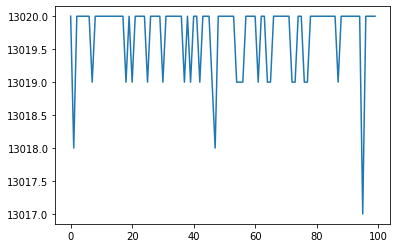

In [171]:
#plotting the number of training rows for each patient
import matplotlib.pyplot as plt

ys = list_training_set_rows
xs = [x for x in range(len(ys))]

plt.plot(xs, ys)
plt.show()
plt.close()

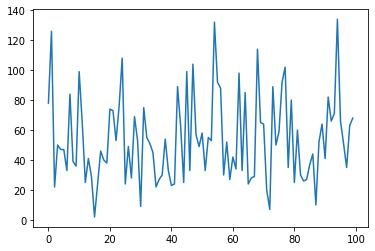

In [172]:
#plotting number of feature columns for each patient
ys = list_training_set_feature_number
xs = [x for x in range(len(ys))]

plt.plot(xs, ys)
plt.show()
plt.close()


## Trying LightGMB for this dataset

In [ ]:
%%time
#dataset_feb04=dataset_feb04.applymap(str)

list_patients=dataset_feb04["patient_id"].unique()



# for j in range(10):
#     print("Diagnosis:",j+1)
#     jj=10-j
#     #print(jj)
# list_score=[]
list_original_labels=[]
list_predicted_labels=[]
list_training_set_rows=[]
list_training_set_feature_number=[]
for i in range(len(list_patients)):
    print(i)
    if i>99: #doing for only 100 patients for now
        break
    patient_id=list_patients[i]
    #patient_id=str(18230098)
    #making test_set
    test_set=dataset_feb04.query("patient_id == @patient_id") #Taking only one patients all info as test set
    #test_set=test_set.replace("nan",np.nan)
    test_set=test_set.dropna(axis=1, how='all')
    display(test_set)
    
    
    #making the training set
    list_columns=test_set.columns.tolist()
    data1=dataset_feb04[list_columns]
    training_set=data1.query("patient_id != @patient_id")
    training_set=training_set.reset_index()
    #training_set=training_set.replace("nan",np.nan)
    training_set=training_set.drop(['index'], axis=1)
    display(training_set)
    #print("Number of unique patients in training set",len(training_set["patient_id"].unique()))
    
    list_training_set_rows.append(training_set.shape[0])
    list_training_set_feature_number.append(len(training_set.columns)-2)
    
    #print("test train set is done")
    #print(test_set)
    #print(training_set)
    col_n=len(test_set.columns)
    
    #display(training_set)
    #display(test_set)

    X_train=training_set.iloc[:,1:col_n-1]
    X_test=test_set.iloc[:,1:col_n-1]
    y_train=training_set.iloc[:,col_n-1]
    y_test=test_set.iloc[:,col_n-1]

#     display(X_train)
#     display(X_test)
#     display(y_train)
#     display(y_test)

    X_train=X_train.values
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values  

    #print("values of test train set are extracted")
    
    ##Replacing null values with mean
    
    a=X_train
    X_train=np.where(pd.isnull(a), ma.array(a, mask=pd.isnull(a)).mean(axis=0), a)  
    
    b=X_test
    X_test=np.where(pd.isnull(b), ma.array(b, mask=pd.isnull(b)).mean(axis=0), b)  
    #print(X_train)
    
#     for k in range(X_train)
#     X_train[X_train == 'nan'] = 0.0
#     X_test[X_test == 'nan'] = 0.0

    #display(X_train)
    oversample = SMOTE()
    X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

    # Feature Scaling 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train_res)
    X_test = sc_X.transform(X_test)

    #print("defining rf")

    lgb_classifier = lgb.LGBMClassifier()
    lgb_classifier.fit(X_train_res, y_train_res)

    # Predicting the Test set results
    y_pred_rf = Rfclassifier.predict(X_test)
    #print('y_preds_rf:', y_pred_rf)
    for j in range(len(y_test)):
        #print(j)
        list_original_labels.append(y_test[j])
        list_predicted_labels.append(y_pred_rf[j])

#     # Making the confusion Matrix
#     cm_rf = confusion_matrix(y_test, y_pred_rf)
#     #print('confusion matrix_rf:', cm_rf)

#     # predict for the patient

#     cm_rf = confusion_matrix(y_test, y_pred_rf)


#     def rf_report():
#         patient_pred_rf = Rfclassifier.predict(X_test)
#         report = classification_report(y_test, y_pred_rf, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()

#         return df_report

#     rf_report()
#     df_rf=rf_report()
#     display(df_rf)
#     val_rf=df_rf['f1-score']['macro avg']
    #print("For","Random forest macro avg F1 score",val_rf)
#     list_score.append(val_rf)

#print("Average macro avg F1 score is",np.mean(list_score))
print(list_original_labels)
print(list_predicted_labels)
cm_rf = confusion_matrix(list_original_labels,list_predicted_labels)
report = classification_report(list_original_labels,list_predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

## Trying XGBoost for this dataset

In [ ]:
%%time
#dataset_feb04=dataset_feb04.applymap(str)

list_patients=dataset_feb04["patient_id"].unique()



# for j in range(10):
#     print("Diagnosis:",j+1)
#     jj=10-j
#     #print(jj)
# list_score=[]
list_original_labels=[]
list_predicted_labels=[]
list_training_set_rows=[]
list_training_set_feature_number=[]
for i in range(len(list_patients)):
    print(i)
    if i>99: #doing for only 100 patients for now
        break
    patient_id=list_patients[i]
    #patient_id=str(18230098)
    #making test_set
    test_set=dataset_feb04.query("patient_id == @patient_id") #Taking only one patients all info as test set
    #test_set=test_set.replace("nan",np.nan)
    test_set=test_set.dropna(axis=1, how='all')
    display(test_set)
    
    
    #making the training set
    list_columns=test_set.columns.tolist()
    data1=dataset_feb04[list_columns]
    training_set=data1.query("patient_id != @patient_id")
    training_set=training_set.reset_index()
    #training_set=training_set.replace("nan",np.nan)
    training_set=training_set.drop(['index'], axis=1)
    display(training_set)
    #print("Number of unique patients in training set",len(training_set["patient_id"].unique()))
    
    list_training_set_rows.append(training_set.shape[0])
    list_training_set_feature_number.append(len(training_set.columns)-2)
    
    #print("test train set is done")
    #print(test_set)
    #print(training_set)
    col_n=len(test_set.columns)
    
    #display(training_set)
    #display(test_set)

    X_train=training_set.iloc[:,1:col_n-1]
    X_test=test_set.iloc[:,1:col_n-1]
    y_train=training_set.iloc[:,col_n-1]
    y_test=test_set.iloc[:,col_n-1]

#     display(X_train)
#     display(X_test)
#     display(y_train)
#     display(y_test)

    X_train=X_train.values
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values  

    #print("values of test train set are extracted")
    
    ##Replacing null values with mean
    
    a=X_train
    X_train=np.where(pd.isnull(a), ma.array(a, mask=pd.isnull(a)).mean(axis=0), a)  
    
    b=X_test
    X_test=np.where(pd.isnull(b), ma.array(b, mask=pd.isnull(b)).mean(axis=0), b)  
    #print(X_train)
    
#     for k in range(X_train)
#     X_train[X_train == 'nan'] = 0.0
#     X_test[X_test == 'nan'] = 0.0

    #display(X_train)
    oversample = SMOTE()
    X_train_res, y_train_res = oversample.fit_resample(X_train, y_train)

    # Feature Scaling 
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train_res)
    X_test = sc_X.transform(X_test)

    #print("defining rf")

    xgclassifier = XGBClassifier(n_estimators=10, criterion='entropy', class_weight="balanced_subsample", random_state=42)

    xgclassifier.fit(X_train_res, y_train_res.ravel())

    # Predicting the Test set results
    y_pred_rf = Rfclassifier.predict(X_test)
    #print('y_preds_rf:', y_pred_rf)
    for j in range(len(y_test)):
        #print(j)
        list_original_labels.append(y_test[j])
        list_predicted_labels.append(y_pred_rf[j])

#     # Making the confusion Matrix
#     cm_rf = confusion_matrix(y_test, y_pred_rf)
#     #print('confusion matrix_rf:', cm_rf)

#     # predict for the patient

#     cm_rf = confusion_matrix(y_test, y_pred_rf)


#     def rf_report():
#         patient_pred_rf = Rfclassifier.predict(X_test)
#         report = classification_report(y_test, y_pred_rf, output_dict=True)
#         df_report = pd.DataFrame(report).transpose()

#         return df_report

#     rf_report()
#     df_rf=rf_report()
#     display(df_rf)
#     val_rf=df_rf['f1-score']['macro avg']
    #print("For","Random forest macro avg F1 score",val_rf)
#     list_score.append(val_rf)

#print("Average macro avg F1 score is",np.mean(list_score))
print(list_original_labels)
print(list_predicted_labels)
cm_rf = confusion_matrix(list_original_labels,list_predicted_labels)
report = classification_report(list_original_labels,list_predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report